<a href="https://colab.research.google.com/github/Matheusfrej/data-science-project/blob/main/Projeto%201/car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

Seed de aleatoriedade do numpy para reproducibilidade

In [ ]:
np.random.seed(1)

## Conexão com o Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Obtenção do dataset

### Sobre o dataset:

Obtido em: https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil

Cada observação corresponde a um preço médio de automóvel, calculado para um mês de um ano de referência. Ou seja, em um ano existem 12 observações relacionadas ao mesmo carro, porém avg_price_brl pode ser diferente.

As variáveis ​​combustível, marcha e tamanho do motor foram extraídas dos valores da coluna modelo, pois no original não há coluna dedicada a esses valores. Como alguns valores do modelo não contêm as informações do tamanho do motor, este conjunto de dados não contém todos os dados do original da FIPE. Além disso, se 'Aut.' não está presente no modelo, o carro é considerado manual.

Os preços são calculados pela FIPE e estão aqui como originais (em reais).


In [ ]:
cars = pd.read_csv('/content/drive/My Drive/Ciencia de dados individual/fipe_cars.csv')

Visualizando o cabeçalho do dataset

In [ ]:
cars.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


Dimensões do dataset

In [ ]:
cars.shape

(599007, 11)

Como o dataset tem muitas linhas, vou pegar uma amostra de 1% dele para trabalhar e com um random_state=1 para que sempre venham os mesmos dados toda vez que for rodado

In [ ]:
cars = cars.sample(n=int(len(cars) * 0.01), random_state=1).reset_index()

In [ ]:
cars.shape

(5990, 12)

In [ ]:
cars.head()

,index,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,505306,2022,October,004333-8,nsx2y5tjy0fx,GM - Chevrolet,PRISMA Sed. Maxx/ LT 1.4 8V ECONOF. 4p,Gasoline,manual,1.4,2011,27685.0
1,332725,2022,March,008041-1,mhskr0y4wcc,Audi,A3 1.8 5p Mec.,Gasoline,manual,1.8,2005,24261.0
2,417490,2022,June,033078-7,hwv55kq9t5csv,Land Rover,Range R.EVOQUE Dynamic Tech 2.0 Aut 3p,Gasoline,automatic,2.0,2014,147161.0
3,410167,2022,June,030001-2,ccdzhl7bpzhc,Daewoo,Espero CD / DLX 2.0,Gasoline,manual,2.0,1997,8483.0
4,309203,2022,February,008188-4,scvn0fw4ygcw2,Audi,S7 4.0 TFSI 420/450cv Quattro S-tronic,Gasoline,manual,4.0,2015,371457.0


## Definição de Tipos

In [ ]:
cars.dtypes

index                   int64
year_of_reference       int64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size           float64
year_model              int64
avg_price_brl         float64
dtype: object

Convertendo tipos object para category

In [ ]:
cars['month_of_reference'] = cars['month_of_reference'].astype('category')
cars['fipe_code'] = cars['fipe_code'].astype('category')
cars['authentication'] = cars['authentication'].astype('category')
cars['brand'] = cars['brand'].astype('category')
cars['model'] = cars['model'].astype('category')
cars['fuel'] = cars['fuel'].astype('category')
cars['gear'] = cars['gear'].astype('category')

In [ ]:
cars.dtypes

index                    int64
year_of_reference        int64
month_of_reference    category
fipe_code             category
authentication        category
brand                 category
model                 category
fuel                  category
gear                  category
engine_size            float64
year_model               int64
avg_price_brl          float64
dtype: object

Descobrindo quais são as categorias das colunas categóricas

In [ ]:
cars['month_of_reference'].cat.categories

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [ ]:
cars['fipe_code'].cat.categories

Index(['001001-4', '001002-2', '001003-0', '001005-7', '001006-5', '001007-3',
       '001008-1', '001009-0', '001010-3', '001011-1',
       ...
       '089018-9', '089019-7', '089020-0', '089028-6', '090002-8', '090004-4',
       '090007-9', '093001-6', '093004-0', '094001-1'],
      dtype='object', length=3323)

In [ ]:
cars['authentication'].cat.categories

Index(['000ltz0bvlc', '00tyzk26shfx', '01g1cmltnldd6', '01l9xq9nybp',
       '02qgzyqzmbgk', '02w8mglk6tdd6', '02wklm2ny3p', '034f6ts53qj4',
       '03d8329kt4vt', '0402hj0mdkp',
       ...
       'zvtq8ljf19vt', 'zw916tyc8nc6r', 'zx6jg0c9ygr7', 'zxh2qtl845fx',
       'zxth193hczdd6', 'zxyqspjj2pdd6', 'zy0zb9x1skrl', 'zynbhtfftcy1',
       'zytzn8spzyp', 'zyzwg94j53j4'],
      dtype='object', length=5990)

In [ ]:
cars['brand'].cat.categories

Index(['AM Gen', 'ASTON MARTIN', 'Acura', 'Agrale', 'Alfa Romeo',
       'Asia Motors', 'Audi', 'BMW', 'BRM', 'Baby', 'Buggy', 'CAB Motors',
       'CBT Jipe', 'CHANA', 'CHANGAN', 'Cadillac', 'Caoa Chery', 'Chrysler',
       'Citroën', 'Daewoo', 'Daihatsu', 'Dodge', 'EFFA', 'Engesa', 'Envemo',
       'FOTON', 'Ferrari', 'Fiat', 'Fibravan', 'Ford', 'Fyber',
       'GM - Chevrolet', 'HAFEI', 'Honda', 'Hyundai', 'IVECO', 'Isuzu', 'JAC',
       'JINBEI', 'JPX', 'Jaguar', 'Jeep', 'Kia Motors', 'LIFAN', 'Lada',
       'Land Rover', 'Lexus', 'Lotus', 'MINI', 'Mahindra', 'Maserati', 'Matra',
       'Mazda', 'Mclaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Plymouth', 'Porsche', 'RAM', 'RELY', 'Renault', 'Rolls-Royce', 'Rover',
       'SSANGYONG', 'Saab', 'Saturn', 'Seat', 'Subaru', 'Suzuki', 'TAC',
       'Toyota', 'Troller', 'VW - VolksWagen', 'Volvo', 'Wake', 'Walk',
       'smart'],
      dtype='object')

In [ ]:
cars['model'].cat.categories

Index(['106 Quiksilver 1.0 3p', '106 Selection 1.0 3p', '106 Selection 1.0 5p',
       '106 Soleil 1.0 5p', '118i Sport 1.5 TB 12V Aut. 5p',
       '118iA 2.0 16V 136cv 3p', '118iA 2.0 16V 136cv 5p',
       '118iA Full 1.6 TB 16V 170cv 5p',
       '118iA/ Urban/Sport 1.6 TB 16V 170cv 5p',
       '120i 2.0 16V 150cv/ 156cv 5p',
       ...
       'up! Pepper 1.0 TSI T.Flex 12V 5p',
       'up! Xtreme 1.0 TSI Total Flex 12V 5p',
       'up! black/white/red 1.0 T. Flex 12V 5p',
       'up! cross 1.0 T. Flex 12V 5p', 'up! cross 1.0 TSI Total Flex 12V 5p',
       'up! high 1.0 TSI Total Flex 12V 5p',
       'up! high I MOTION 1.0 T. Flex 12V 5p',
       'up! move 1.0 Total Flex 12V 5p', 'up! take 1.0 Total Flex 12V 5p',
       'up! track 1.0 Total Flex 12V 5p'],
      dtype='object', length=3342)

In [ ]:
cars['fuel'].cat.categories

Index(['Alcohol', 'Diesel', 'Gasoline'], dtype='object')

In [ ]:
cars['gear'].cat.categories

Index(['automatic', 'manual'], dtype='object')

Removendo colunas que não interessam, após ver o conteúdo delas

In [ ]:
cars = cars.drop(['fipe_code', 'authentication'], axis=1)

In [ ]:
cars.head()

,index,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,505306,2022,October,GM - Chevrolet,PRISMA Sed. Maxx/ LT 1.4 8V ECONOF. 4p,Gasoline,manual,1.4,2011,27685.0
1,332725,2022,March,Audi,A3 1.8 5p Mec.,Gasoline,manual,1.8,2005,24261.0
2,417490,2022,June,Land Rover,Range R.EVOQUE Dynamic Tech 2.0 Aut 3p,Gasoline,automatic,2.0,2014,147161.0
3,410167,2022,June,Daewoo,Espero CD / DLX 2.0,Gasoline,manual,2.0,1997,8483.0
4,309203,2022,February,Audi,S7 4.0 TFSI 420/450cv Quattro S-tronic,Gasoline,manual,4.0,2015,371457.0


Dropando index pois ele foi criado junto com a definição da amostra

In [ ]:
cars = cars.drop('index', axis=1)

In [ ]:
cars.describe()

,year_of_reference,engine_size,year_model,avg_price_brl
count,5990.000000,5990.000000,5990.000000,5.990000e+03
mean,2021.569783,2.264374,2008.819699,1.154272e+05
std,0.579083,1.027144,9.282502,3.156505e+05
min,2021.000000,0.700000,1985.000000,1.985000e+03
25%,2021.000000,1.600000,2001.000000,1.999100e+04
50%,2022.000000,2.000000,2011.000000,4.412000e+04
75%,2022.000000,2.800000,2017.000000,1.016262e+05
max,2023.000000,6.700000,2023.000000,8.600000e+06


## Normalização

A normalização é útil para equilibrar os pesos dos campos para o cálculo de distâncias, por exemplo. Se tem um campo com valores muito maiores que outro campo, ele teria muito mais influência caso não haja normalização.

In [ ]:
cars.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2022,October,GM - Chevrolet,PRISMA Sed. Maxx/ LT 1.4 8V ECONOF. 4p,Gasoline,manual,1.4,2011,27685.0
1,2022,March,Audi,A3 1.8 5p Mec.,Gasoline,manual,1.8,2005,24261.0
2,2022,June,Land Rover,Range R.EVOQUE Dynamic Tech 2.0 Aut 3p,Gasoline,automatic,2.0,2014,147161.0
3,2022,June,Daewoo,Espero CD / DLX 2.0,Gasoline,manual,2.0,1997,8483.0
4,2022,February,Audi,S7 4.0 TFSI 420/450cv Quattro S-tronic,Gasoline,manual,4.0,2015,371457.0


Normalizando com média e desvio padrão do scikit learn

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cars['avg_price_brl_norm'] = scaler.fit_transform(cars[['avg_price_brl']])
cars['avg_price_brl_norm'].describe()

count    5.990000e+03
mean     9.786273e-18
std      1.000083e+00
min     -3.594219e-01
25%     -3.023730e-01
50%     -2.259245e-01
75%     -4.372593e-02
max      2.688189e+01
Name: avg_price_brl_norm, dtype: float64

## Tratamento de dados ausentes

Irei aplicar o kNN para preencher os dados ausentes, mas, para isso, todos os dados precisam ser numéricos, para que o cálculo da distância seja feito. Esse método de preencher o valor através dos vizinhos mais próximos é mais confiável do que colocar todos os valores ausentes como a média ou como a mediana.

In [ ]:
print(cars.isnull().sum())

year_of_reference     0
month_of_reference    0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
avg_price_brl_norm    0
dtype: int64


O dataset não tem dados ausentes

Irei remover aleatoriamente alguns dados para que eu possa trabalhar a etapa de Tratamento de dados ausentes


In [ ]:
num_rows, num_cols = cars.shape

percent_data_to_remove = 0.1  # 10% dos dados
num_cols_to_remove = 4

num_values_to_remove = int(num_rows * percent_data_to_remove)
num_cols_to_remove = min(num_cols, num_cols_to_remove)

indices_rows = np.random.choice(num_rows, size=num_values_to_remove, replace=False)
indices_cols = np.random.choice(num_cols, size=num_cols_to_remove, replace=False)

cars.iloc[indices_rows, indices_cols] = np.nan

In [ ]:
print(cars.isnull().sum())

year_of_reference     599
month_of_reference      0
brand                 599
model                   0
fuel                    0
gear                    0
engine_size           599
year_model              0
avg_price_brl           0
avg_price_brl_norm    599
dtype: int64


In [ ]:
cars.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm
0,2022.0,October,GM - Chevrolet,PRISMA Sed. Maxx/ LT 1.4 8V ECONOF. 4p,Gasoline,manual,1.4,2011,27685.0,-0.277996
1,2022.0,March,Audi,A3 1.8 5p Mec.,Gasoline,manual,1.8,2005,24261.0,-0.288844
2,2022.0,June,Land Rover,Range R.EVOQUE Dynamic Tech 2.0 Aut 3p,Gasoline,automatic,2.0,2014,147161.0,0.100543
3,2022.0,June,Daewoo,Espero CD / DLX 2.0,Gasoline,manual,2.0,1997,8483.0,-0.338834
4,NaN,February,NaN,S7 4.0 TFSI 420/450cv Quattro S-tronic,Gasoline,manual,NaN,2015,371457.0,NaN


Observando as correlações antes de aplicar o knn e imputar dados

In [ ]:
cars.corr(method='spearman', numeric_only=True)

,year_of_reference,engine_size,year_model,avg_price_brl,avg_price_brl_norm
year_of_reference,1.000000,0.008631,0.004847,0.065869,0.065869
engine_size,0.008631,1.000000,-0.124462,0.364863,0.364863
year_model,0.004847,-0.124462,1.000000,0.792243,0.794228
avg_price_brl,0.065869,0.364863,0.792243,1.000000,1.000000
avg_price_brl_norm,0.065869,0.364863,0.794228,1.000000,1.000000


Pode ser observado que o preço médio do carro tem uma alta correlação com o ano do modelo, que é a idade dele, pois quanto mais velho, mais barato fica o carro. Então quanto maior o ano, maior o preço médio também.

In [ ]:
cars.dtypes

year_of_reference      float64
month_of_reference    category
brand                 category
model                 category
fuel                  category
gear                  category
engine_size            float64
year_model               int64
avg_price_brl          float64
avg_price_brl_norm     float64
dtype: object

In [ ]:
cars['month_of_reference'] = cars['month_of_reference'].cat.codes
cars['brand'] = cars['brand'].cat.codes
cars['model'] = cars['model'].cat.codes
cars['fuel'] = cars['fuel'].cat.codes
cars['gear'] = cars['gear'].cat.codes

In [ ]:
cars.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm
0,2022.0,10,31,2100,2,1,1.4,2011,27685.0,-0.277996
1,2022.0,7,6,282,2,1,1.8,2005,24261.0,-0.288844
2,2022.0,6,45,2391,2,0,2.0,2014,147161.0,0.100543
3,2022.0,6,19,1186,2,1,2.0,1997,8483.0,-0.338834
4,NaN,3,-1,2588,2,1,NaN,2015,371457.0,NaN


In [ ]:
cars.corr(method='spearman', numeric_only=True)

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm
year_of_reference,1.000000,-0.044698,-0.025415,0.013108,-0.020181,-0.013929,0.008631,0.004847,0.065869,0.065869
month_of_reference,-0.044698,1.000000,-0.001226,-0.011670,-0.001003,-0.005905,-0.021775,0.003700,0.001776,0.000237
brand,-0.025415,-0.001226,1.000000,0.072809,-0.037474,-0.058882,-0.048985,0.016267,-0.009273,-0.000171
model,0.013108,-0.011670,0.072809,1.000000,-0.073456,0.021058,0.002245,0.055800,0.036782,0.036327
fuel,-0.020181,-0.001003,-0.037474,-0.073456,1.000000,-0.081754,-0.312738,-0.011280,-0.169279,-0.166477
gear,-0.013929,-0.005905,-0.058882,0.021058,-0.081754,1.000000,-0.037487,-0.363145,-0.336664,-0.336456
engine_size,0.008631,-0.021775,-0.048985,0.002245,-0.312738,-0.037487,1.000000,-0.124462,0.364863,0.364863
year_model,0.004847,0.003700,0.016267,0.055800,-0.011280,-0.363145,-0.124462,1.000000,0.792243,0.794228
avg_price_brl,0.065869,0.001776,-0.009273,0.036782,-0.169279,-0.336664,0.364863,0.792243,1.000000,1.000000
avg_price_brl_norm,0.065869,0.000237,-0.000171,0.036327,-0.166477,-0.336456,0.364863,0.794228,1.000000,1.000000


Acima é possível observar outras correlações interessantes. A correlação entre o gear e o ano do modelo. gear é a marcha que pode ser manual ou automático. gear = 1 é manual e gear = 0 ficou automático. Tem uma correlação negativa entre os dois, pois quanto maior o ano, menos carros manuais existem e mais automáticos existem, que é representado por 0.

Outra correlação é a do preço médio com o tamanho do motor/cilindrada (engine_size). Quanto maior a cilindrada, maior o preço médio dos carros.

In [ ]:
cars.describe()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm
count,5391.000000,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5391.000000,5990.000000,5.990000e+03,5391.000000
mean,2021.570395,5.447579,38.853088,1686.074290,1.806678,0.724207,2.258171,2008.819699,1.154272e+05,-0.007480
std,0.579014,3.368379,24.210426,950.512586,0.427423,0.446950,1.020647,9.282502,3.156505e+05,0.949148
min,2021.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.700000,1985.000000,1.985000e+03,-0.358706
25%,2021.000000,3.000000,27.000000,885.000000,2.000000,0.000000,1.600000,2001.000000,1.999100e+04,-0.303005
50%,2022.000000,5.000000,33.000000,1695.500000,2.000000,1.000000,2.000000,2011.000000,4.412000e+04,-0.227065
75%,2022.000000,8.000000,59.000000,2504.750000,2.000000,1.000000,2.800000,2017.000000,1.016262e+05,-0.044685
max,2023.000000,11.000000,78.000000,3341.000000,2.000000,1.000000,6.700000,2023.000000,8.600000e+06,26.881890


In [ ]:
!pip install fancyimpute

In [ ]:
from fancyimpute import KNN
cars_knn = KNN(k=3).fit_transform(cars)

Imputing row 1/5990 with 0 missing, elapsed time: 7.458
Imputing row 101/5990 with 0 missing, elapsed time: 7.462
Imputing row 201/5990 with 3 missing, elapsed time: 7.466
Imputing row 301/5990 with 0 missing, elapsed time: 7.470
Imputing row 401/5990 with 0 missing, elapsed time: 7.474
Imputing row 501/5990 with 0 missing, elapsed time: 7.477
Imputing row 601/5990 with 0 missing, elapsed time: 7.480
Imputing row 701/5990 with 0 missing, elapsed time: 7.484
Imputing row 801/5990 with 0 missing, elapsed time: 7.487
Imputing row 901/5990 with 0 missing, elapsed time: 7.489
Imputing row 1001/5990 with 0 missing, elapsed time: 7.492
Imputing row 1101/5990 with 0 missing, elapsed time: 7.495
Imputing row 1201/5990 with 0 missing, elapsed time: 7.498
Imputing row 1301/5990 with 0 missing, elapsed time: 7.501
Imputing row 1401/5990 with 0 missing, elapsed time: 7.503
Imputing row 1501/5990 with 0 missing, elapsed time: 7.506
Imputing row 1601/5990 with 0 missing, elapsed time: 7.509
Imputing 

In [ ]:
cars.columns

Index(['year_of_reference', 'month_of_reference', 'brand', 'model', 'fuel',
       'gear', 'engine_size', 'year_model', 'avg_price_brl',
       'avg_price_brl_norm'],
      dtype='object')

In [ ]:
cars_knn.shape

(5990, 10)

In [ ]:
# cars.shape
cars2 = pd.DataFrame(data=cars_knn[0:,0:],columns=['year_of_reference', 'month_of_reference', 'brand', 'model', 'fuel',
       'gear', 'engine_size', 'year_model', 'avg_price_brl', 'avg_price_brl_norm'])

In [ ]:
cars2.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm
0,2022.000000,10.0,31.0,2100.0,2.0,1.0,1.400000,2011.0,27685.0,-0.277996
1,2022.000000,7.0,6.0,282.0,2.0,1.0,1.800000,2005.0,24261.0,-0.288844
2,2022.000000,6.0,45.0,2391.0,2.0,0.0,2.000000,2014.0,147161.0,0.100543
3,2022.000000,6.0,19.0,1186.0,2.0,1.0,2.000000,1997.0,8483.0,-0.338834
4,2022.184267,3.0,-1.0,2588.0,2.0,1.0,2.815759,2015.0,371457.0,0.809500


In [ ]:
print(cars2.isnull().sum())

year_of_reference     0
month_of_reference    0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
avg_price_brl_norm    0
dtype: int64


É possível observar que enquanto a média é 100 mil, a mediana é 40 mil, apontando que podem ter alguns carros muito caros que estão puxando a média para cima.

In [ ]:
cars2.describe()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm
count,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5.990000e+03,5990.000000
mean,2021.569094,5.447579,38.853088,1686.074290,1.806678,0.724207,2.260645,2008.819699,1.154272e+05,-0.000163
std,0.564746,3.368379,24.210426,950.512586,0.427423,0.446950,1.008563,9.282502,3.156505e+05,0.998057
min,2020.999851,0.000000,-1.000000,0.000000,0.000000,0.000000,0.700000,1985.000000,1.985000e+03,-0.358706
25%,2021.000000,3.000000,27.000000,885.000000,2.000000,0.000000,1.600000,2001.000000,1.999100e+04,-0.302351
50%,2021.847767,5.000000,33.000000,1695.500000,2.000000,1.000000,2.000000,2011.000000,4.412000e+04,-0.225924
75%,2022.000000,8.000000,59.000000,2504.750000,2.000000,1.000000,2.700000,2017.000000,1.016262e+05,-0.043726
max,2023.000000,11.000000,78.000000,3341.000000,2.000000,1.000000,6.700000,2023.000000,8.600000e+06,26.881890


In [ ]:
cars2.corr(method='spearman', numeric_only=True)

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm
year_of_reference,1.000000,-0.046143,-0.022525,0.008146,-0.020034,-0.009616,0.006526,0.007638,0.062874,0.062870
month_of_reference,-0.046143,1.000000,-0.001226,-0.011670,-0.001003,-0.005905,-0.018784,0.003700,0.001776,0.001754
brand,-0.022525,-0.001226,1.000000,0.072809,-0.037474,-0.058882,-0.056679,0.016267,-0.009273,-0.009280
model,0.008146,-0.011670,0.072809,1.000000,-0.073456,0.021058,0.001303,0.055800,0.036782,0.036778
fuel,-0.020034,-0.001003,-0.037474,-0.073456,1.000000,-0.081754,-0.292393,-0.011280,-0.169279,-0.169281
gear,-0.009616,-0.005905,-0.058882,0.021058,-0.081754,1.000000,-0.047063,-0.363145,-0.336664,-0.336659
engine_size,0.006526,-0.018784,-0.056679,0.001303,-0.292393,-0.047063,1.000000,-0.081848,0.378171,0.378165
year_model,0.007638,0.003700,0.016267,0.055800,-0.011280,-0.363145,-0.081848,1.000000,0.792243,0.792239
avg_price_brl,0.062874,0.001776,-0.009273,0.036782,-0.169279,-0.336664,0.378171,0.792243,1.000000,1.000000
avg_price_brl_norm,0.062870,0.001754,-0.009280,0.036778,-0.169281,-0.336659,0.378165,0.792239,1.000000,1.000000


A média, mediana e as correlações se mantiveram parecidas antes e depois da imputação de dados, então essa imputação não mexeu na essência dos dados, o que é ideal.

## Discretização

Responsável por transformar valores contínuos em categóricos.

 É interessante categorizar o preço dos carros em intervalos, para definir carros muito baratos, baratos, razoáveis e caros.

In [ ]:
cars2['avg_price_brl_interval'] = pd.cut(cars2['avg_price_brl'], 4)

In [ ]:
cars2['avg_price_brl_interval'].value_counts()

avg_price_brl_interval
(-6613.015, 2151488.75]    5965
(2151488.75, 4300992.5]      16
(4300992.5, 6450496.25]       6
(6450496.25, 8600000.0]       3
Name: count, dtype: int64

A divisão não ficou muito boa, carros até 215 mil reais estão todos na primeira categoria. Não está bem distribuído.

Utilizando o qcut, ele distribui em intervalos com a mesma quantidade de instâncias em cada intervalo.

In [ ]:
cars2['avg_price_brl_interval'] = pd.qcut(cars2['avg_price_brl'], 4)

In [ ]:
cars2['avg_price_brl_interval'].value_counts()

avg_price_brl_interval
(1984.999, 19991.0]       1498
(19991.0, 44120.0]        1498
(101626.25, 8600000.0]    1498
(44120.0, 101626.25]      1496
Name: count, dtype: int64

In [ ]:
cars2.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval
0,2022.000000,10.0,31.0,2100.0,2.0,1.0,1.400000,2011.0,27685.0,-0.277996,"(19991.0, 44120.0]"
1,2022.000000,7.0,6.0,282.0,2.0,1.0,1.800000,2005.0,24261.0,-0.288844,"(19991.0, 44120.0]"
2,2022.000000,6.0,45.0,2391.0,2.0,0.0,2.000000,2014.0,147161.0,0.100543,"(101626.25, 8600000.0]"
3,2022.000000,6.0,19.0,1186.0,2.0,1.0,2.000000,1997.0,8483.0,-0.338834,"(1984.999, 19991.0]"
4,2022.184267,3.0,-1.0,2588.0,2.0,1.0,2.815759,2015.0,371457.0,0.809500,"(101626.25, 8600000.0]"


Eu posso nomear esses intervalos para as categorias do meu interesse

In [ ]:
cars2['avg_price_brl_interval'] = pd.qcut(cars2['avg_price_brl'], 4, labels=["muito barato", "barato", "razoavel", "caro"])

In [ ]:
cars2['avg_price_brl_interval'].value_counts()

avg_price_brl_interval
muito barato    1498
barato          1498
caro            1498
razoavel        1496
Name: count, dtype: int64

In [ ]:
cars2.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval
0,2022.000000,10.0,31.0,2100.0,2.0,1.0,1.400000,2011.0,27685.0,-0.277996,barato
1,2022.000000,7.0,6.0,282.0,2.0,1.0,1.800000,2005.0,24261.0,-0.288844,barato
2,2022.000000,6.0,45.0,2391.0,2.0,0.0,2.000000,2014.0,147161.0,0.100543,caro
3,2022.000000,6.0,19.0,1186.0,2.0,1.0,2.000000,1997.0,8483.0,-0.338834,muito barato
4,2022.184267,3.0,-1.0,2588.0,2.0,1.0,2.815759,2015.0,371457.0,0.809500,caro


## Limpeza e Detecção de Outliers

Visualizando todas as linhas duplicadas

o parametro subset escolhe quais colunas são consideradas na hora de ver as linhas duplicadas ou nao.

In [ ]:
columns_subset = subset=['brand', 'model', 'fuel', 'gear',
                                          'engine_size', 'year_model', 'avg_price_brl',
                                          'avg_price_brl_norm', 'avg_price_brl_interval']

cars2[cars2.duplicated(keep=False, subset=columns_subset)]

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval
4350,2022.0,7.0,26.0,2095.0,2.0,1.0,3.9,2023.0,3500000.0,10.723429,caro
5105,2022.0,6.0,26.0,2095.0,2.0,1.0,3.9,2023.0,3500000.0,10.723429,caro


In [ ]:
cars2.drop_duplicates(keep = False, subset=columns_subset, inplace = True)

In [ ]:
cars2[cars2.duplicated(keep=False, subset=columns_subset)]

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval


### Remoção de outliers


### Univariado utilizando z-score robusto

In [ ]:
cars2['avg_price_brl'].describe()

count    5.988000e+03
mean     1.142968e+05
std      3.095811e+05
min      1.985000e+03
25%      1.998925e+04
50%      4.411100e+04
75%      1.015475e+05
max      8.600000e+06
Name: avg_price_brl, dtype: float64

Pegando os dados originais para ver as categorias e não os códigos delas.

In [ ]:
cars3 = pd.read_csv('/content/drive/My Drive/Ciencia de dados individual/fipe_cars.csv')

In [ ]:
cars3[cars3['avg_price_brl'] == cars3['avg_price_brl'].min()]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
105727,2021,May,019005-5,jn6y2nhx1cp,Lada,Laika 1.5,Gasoline,manual,1.5,1991,1679.0


In [ ]:
cars3[cars3['avg_price_brl'] == cars3['avg_price_brl'].max()]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
556108,2022,December,031053-0,ccvnqfcx41gj1f9,Ferrari,SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido),Gasoline,manual,4.0,2023,8600000.0
580492,2023,January,031053-0,ccvnqfc1h28j1f9,Ferrari,SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido),Gasoline,manual,4.0,2023,8600000.0


Gerando boxplot para observar possíveis outliers

<Axes: >

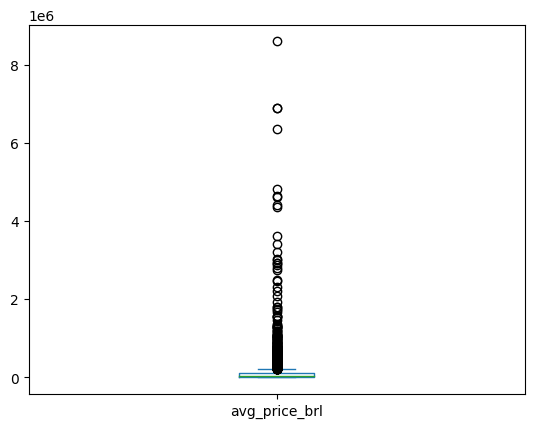

In [ ]:
cars2['avg_price_brl'].plot.box()

Média dos preços dos carros acima da mediana (é uma média muito alta)

In [ ]:
cars2[cars2['avg_price_brl'] > cars2['avg_price_brl'].median()]['avg_price_brl'].mean()

207131.19171676686

Média dos preços dos carros abaixo da mediana. A diferença é muito grande.

In [ ]:
cars2[cars2['avg_price_brl'] < cars2['avg_price_brl'].median()]['avg_price_brl'].mean()

21462.320975283903

Histograma para visualizar distribuição dos preços

<Axes: >

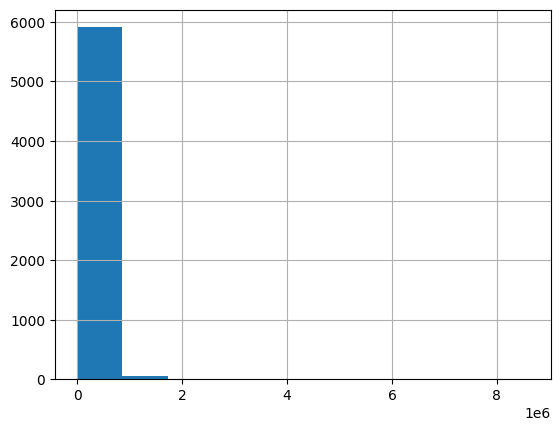

In [ ]:
cars2['avg_price_brl'].hist()

Não é possível observar direito a distribuição, por isso, vou aplicar um log para visualizar melhor essa distribuição.

<Axes: >

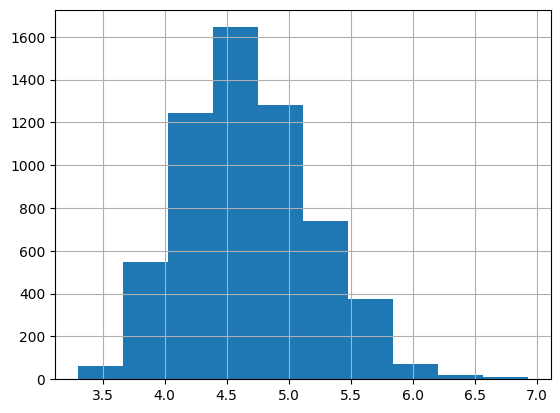

In [ ]:
from numpy import log10
cars2['avg_price_brl_log'] = log10(cars2['avg_price_brl'])
cars2['avg_price_brl_log'].hist()

A distribuição parece seguir uma gaussiana.

Obtendo o mean absolute deviation para utilizar na fórmula do z-score robusto

In [ ]:
from numpy import abs

b = 0.6745

mad = abs(cars2['avg_price_brl_log'] - cars2['avg_price_brl_log'].median()).median()*(1/b)

print(mad)

0.523987250456745


Visualizando para escolher o limiar de outlier

<Axes: >

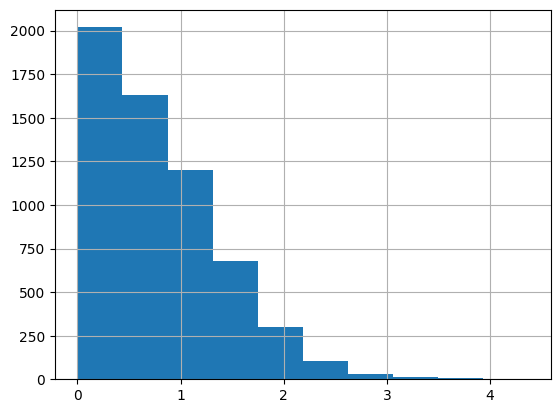

In [ ]:
(abs(cars2['avg_price_brl_log']-cars2['avg_price_brl_log'].median())/mad).hist()

Com limiar = 3:

In [ ]:
limiar = 3

cars2[abs(cars2['avg_price_brl_log']-cars2['avg_price_brl_log'].median())/mad > limiar]

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval,avg_price_brl_log
407,2021.679977,0.0,-1.0,1413.0,2.0,1.0,4.715321,2018.0,2921622.0,8.786124,caro,6.465624
1405,2022.000000,6.0,54.0,1412.0,2.0,1.0,4.000000,2019.0,1725306.0,5.100620,caro,6.236866
1422,2022.000000,1.0,26.0,225.0,2.0,1.0,6.500000,2023.0,6900000.0,21.495736,caro,6.838849
1583,2022.000000,2.0,26.0,2618.0,2.0,1.0,4.000000,2023.0,8600000.0,26.881890,caro,6.934498
1596,2020.999892,10.0,-1.0,171.0,2.0,1.0,6.569762,2017.0,2493971.0,7.449467,caro,6.396891
1650,2021.573407,11.0,-1.0,1238.0,2.0,1.0,5.024136,2015.0,2932582.0,8.835942,caro,6.467250
1735,2022.000119,11.0,-1.0,1239.0,2.0,1.0,3.990242,2022.0,4825077.0,14.238009,caro,6.683504
1782,2022.000000,11.0,53.0,195.0,2.0,1.0,3.800000,2019.0,2867440.0,8.719273,caro,6.457494
2023,2021.000000,9.0,26.0,171.0,2.0,1.0,3.900000,2019.0,2745136.0,8.331774,caro,6.438564
2060,2022.000000,3.0,63.0,1419.0,2.0,0.0,6.600000,2012.0,1921772.0,5.723089,caro,6.283702


In [ ]:
len(cars2)

5988

Aplicando o filtro com o limiar = 3

Observando novo número de instâncias.

In [ ]:
cars2 = cars2[abs(cars2['avg_price_brl_log']-cars2['avg_price_brl_log'].median())/mad < limiar]

len(cars2)

5958

### Bivariado


Observando a relação entre o preço e o ano do modelo do veículo

<Axes: xlabel='year_model', ylabel='avg_price_brl'>

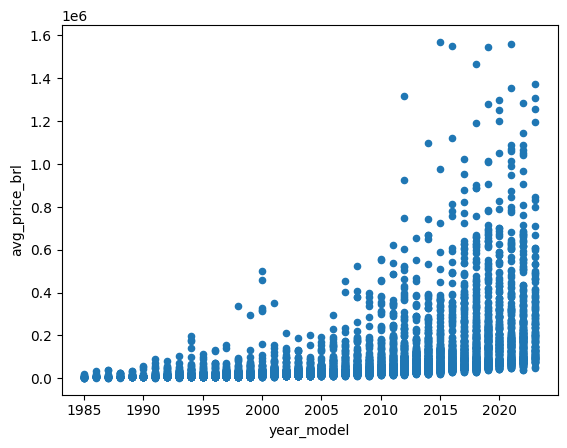

In [ ]:
cars2.plot.scatter(x='year_model',y='avg_price_brl')

Criando uma variável que leva em conta esses dois atributos

In [ ]:
cars2['price_efficiency'] = cars2['avg_price_brl'] / cars2['year_model']

In [ ]:
cars2['price_efficiency'].describe()

count    5958.000000
mean       48.301453
std        76.365390
min         0.996986
25%         9.938266
50%        21.795310
75%        49.612639
max       779.370720
Name: price_efficiency, dtype: float64

<Axes: >

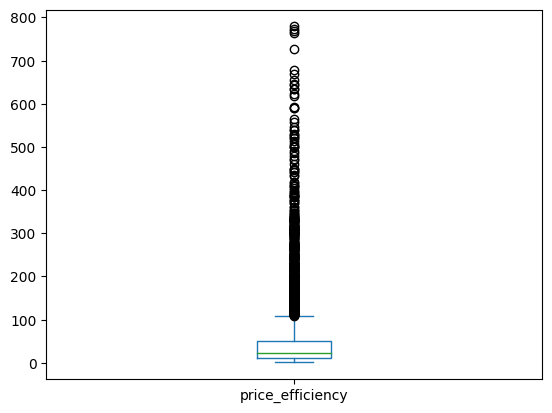

In [ ]:
cars2['price_efficiency'].plot.box()

<Axes: >

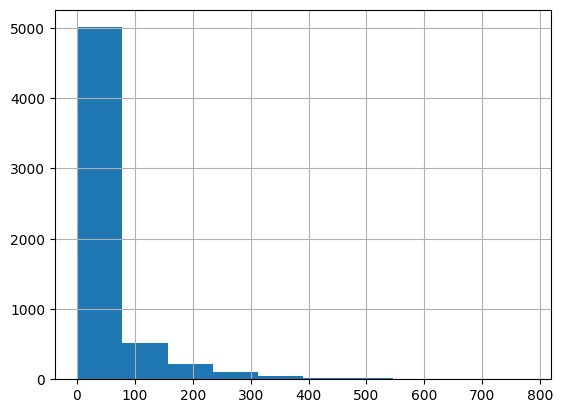

In [ ]:
cars2['price_efficiency'].hist()

In [ ]:
cars2['price_efficiency'] = log10(cars2['price_efficiency'])

<Axes: >

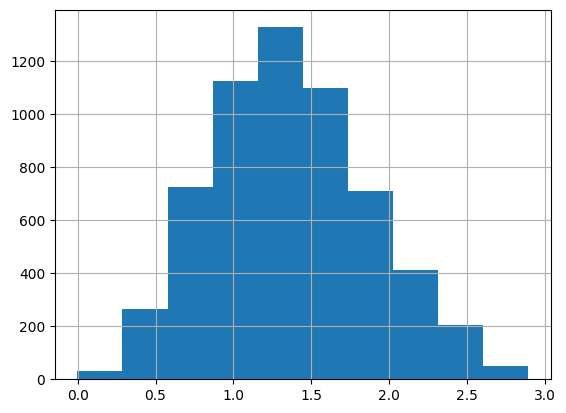

In [ ]:
cars2['price_efficiency'].hist()

Agora que temos um atributo univariado, fazemos a mesma limpeza de outlier através do z-index robusto que serve para encontrar outliers com detecção univariada

In [ ]:
mad = abs(cars2['price_efficiency'] - cars2['price_efficiency'].median()).median()*(1/b)

print(mad)

0.5191948731139244


<Axes: >

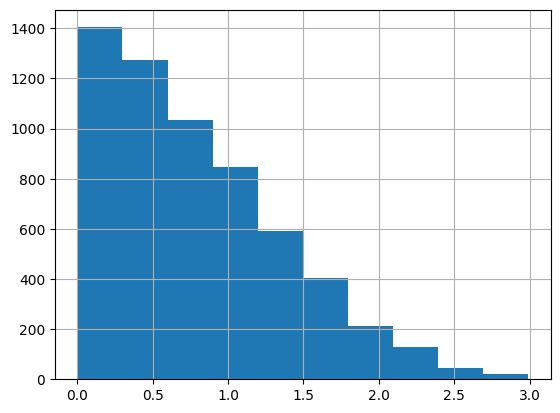

In [ ]:
(abs(cars2['price_efficiency']-cars2['price_efficiency'].median())/mad).hist()

In [ ]:
cars2[abs(cars2['price_efficiency']-cars2['price_efficiency'].median())/mad > limiar]

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval,avg_price_brl_log,price_efficiency


Com o limiar = 3, não foi encontrado nenhum outlier claro para essa análise usando a razão de duas variáveis

### Multivariado

Remoção de outliers utilizando Elliptic Envelope

In [ ]:
cars2.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval,avg_price_brl_log,price_efficiency
0,2022.000000,10.0,31.0,2100.0,2.0,1.0,1.400000,2011.0,27685.0,-0.277996,barato,4.442245,1.138832
1,2022.000000,7.0,6.0,282.0,2.0,1.0,1.800000,2005.0,24261.0,-0.288844,barato,4.384909,1.082794
2,2022.000000,6.0,45.0,2391.0,2.0,0.0,2.000000,2014.0,147161.0,0.100543,caro,5.167793,1.863733
3,2022.000000,6.0,19.0,1186.0,2.0,1.0,2.000000,1997.0,8483.0,-0.338834,muito barato,3.928549,0.628171
4,2022.184267,3.0,-1.0,2588.0,2.0,1.0,2.815759,2015.0,371457.0,0.809500,caro,5.569909,2.265633


In [ ]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)

cars_without_categorical = cars2.drop('avg_price_brl_interval', axis=1)

detector.fit(cars_without_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.361287058416508 > -13.469693296342635). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-12.922072063777867 > -12.961100236709809). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-12.969194796475570 > -13.023157607141350). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/usr/local/lib/p

EllipticEnvelope(contamination=0.01)

In [ ]:
scores = detector.predict(cars_without_categorical)

scores

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
cars2['outlier'] = scores

cars2.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval,avg_price_brl_log,price_efficiency,outlier
0,2022.000000,10.0,31.0,2100.0,2.0,1.0,1.400000,2011.0,27685.0,-0.277996,barato,4.442245,1.138832,1
1,2022.000000,7.0,6.0,282.0,2.0,1.0,1.800000,2005.0,24261.0,-0.288844,barato,4.384909,1.082794,1
2,2022.000000,6.0,45.0,2391.0,2.0,0.0,2.000000,2014.0,147161.0,0.100543,caro,5.167793,1.863733,1
3,2022.000000,6.0,19.0,1186.0,2.0,1.0,2.000000,1997.0,8483.0,-0.338834,muito barato,3.928549,0.628171,1
4,2022.184267,3.0,-1.0,2588.0,2.0,1.0,2.815759,2015.0,371457.0,0.809500,caro,5.569909,2.265633,1


Os outliers são representados por onde a coluna outlier é igual a -1

In [ ]:
cars2[cars2['outlier'] == -1]

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval,avg_price_brl_log,price_efficiency,outlier
44,2021.762082,1.0,-1.0,2372.0,2.0,0.0,5.620003,2023.0,1258950.0,3.618312,caro,6.100008,2.794013,-1
219,2021.195966,6.0,-1.0,252.0,2.0,1.0,3.214964,2022.0,1066800.0,3.017317,caro,6.028083,2.722302,-1
272,2022.000000,3.0,59.0,2202.0,2.0,1.0,2.900000,2021.0,775045.0,2.089884,caro,5.889327,2.583761,-1
341,2021.000000,4.0,59.0,261.0,2.0,1.0,3.600000,2019.0,1280000.0,3.689746,caro,6.107210,2.802074,-1
345,2022.000000,2.0,50.0,2337.0,2.0,1.0,3.800000,2018.0,1467468.0,4.283706,caro,6.166569,2.861647,-1
403,2021.000000,2.0,59.0,242.0,2.0,1.0,3.000000,2022.0,908745.0,2.513489,caro,5.958442,2.652661,-1
581,2021.000000,1.0,59.0,751.0,2.0,1.0,4.000000,2021.0,872145.0,2.397528,caro,5.940589,2.635022,-1
596,2022.000000,5.0,59.0,237.0,2.0,1.0,3.000000,2018.0,903440.0,2.496681,caro,5.955899,2.650978,-1
721,2022.000000,11.0,7.0,3200.0,2.0,0.0,4.400000,2021.0,1012273.0,2.841500,caro,6.005298,2.699731,-1
759,2021.000000,6.0,54.0,2632.0,2.0,0.0,6.300000,2012.0,924769.0,2.564258,caro,5.966033,2.662405,-1


In [ ]:
len(cars2)

5958

In [ ]:
cars2 = cars2[cars2['outlier'] != -1]
len(cars2)

5898

In [ ]:
cars2 = cars2.drop('outlier', axis=1)

## Estatística descritiva dos dados com visualizações

Ao longo desse documento, já plotei algumas visualizações de dados, então irei plotar aqui o que ainda não foi apresentado.

<Axes: >

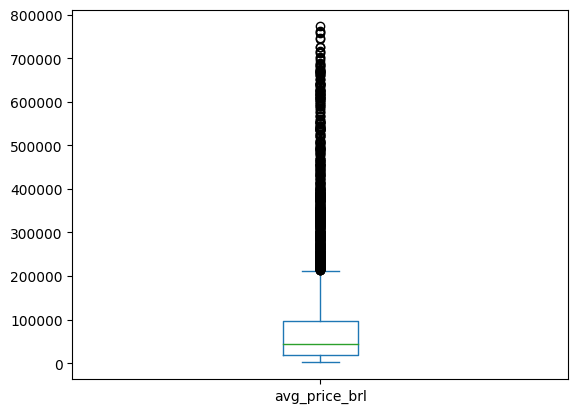

In [ ]:
cars2['avg_price_brl'].plot.box()

In [ ]:
cars2.describe()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_log,price_efficiency
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,2021.568739,5.452187,38.867752,1689.477280,1.803832,0.725161,2.226466,2008.655476,87656.934045,-0.087988,4.657492,1.354591
std,0.565067,3.366057,24.218471,948.933442,0.429937,0.446471,0.966201,9.252015,119031.657737,0.377122,0.495921,0.494385
min,2020.999851,0.000000,-1.000000,0.000000,0.000000,0.000000,0.700000,1985.000000,1985.000000,-0.358706,3.297761,-0.001311
25%,2021.000000,3.000000,27.000000,887.000000,2.000000,0.000000,1.600000,2001.000000,19693.250000,-0.303316,4.294317,0.993336
50%,2021.840215,5.000000,33.000000,1698.500000,2.000000,1.000000,2.000000,2010.000000,43067.000000,-0.229278,4.634145,1.330762
75%,2022.000000,8.000000,59.000000,2507.750000,2.000000,1.000000,2.676673,2016.000000,97319.500000,-0.057371,4.988200,1.684003
max,2023.000000,11.000000,78.000000,3341.000000,2.000000,1.000000,6.700000,2023.000000,772986.000000,2.083360,5.888172,2.583466


Preço médio por modelo

In [ ]:
cars2.groupby(['model'])['avg_price_brl'].mean().sort_values()

model
1851.0      1985.0
1852.0      2211.0
2031.0      2650.0
2894.0      3100.0
845.0       3317.0
            ...   
1507.0    743278.0
2343.0    746533.0
1409.0    757849.0
491.0     759474.0
2200.0    761708.0
Name: avg_price_brl, Length: 3284, dtype: float64

Preço médio por marca

In [ ]:
cars2.groupby(['brand'])['avg_price_brl'].mean().sort_values()

brand
10.0      4473.000000
36.0      6429.000000
19.0      7156.900000
68.0      7498.000000
20.0      9756.444444
            ...      
50.0    366898.250000
0.0     382139.000000
59.0    431336.394231
60.0    448799.500000
1.0     540012.333333
Name: avg_price_brl, Length: 78, dtype: float64

Distribuição de quantidade de carros por ano do modelo

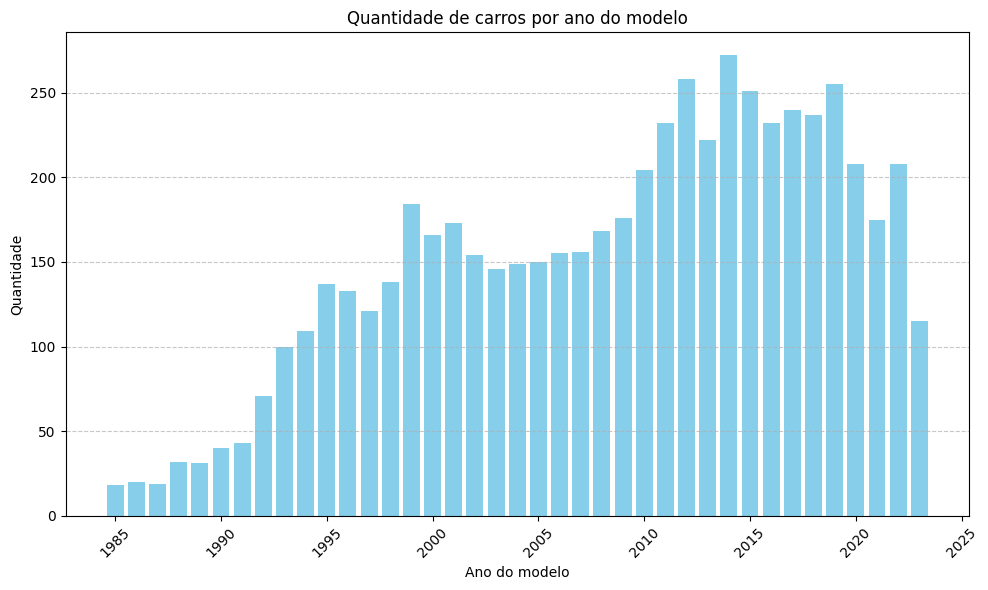

In [ ]:
import matplotlib.pyplot as plt

value_counts = cars2['year_model'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Ano do modelo')
plt.ylabel('Quantidade')
plt.title('Quantidade de carros por ano do modelo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualização da relação entre preço e ano do modelo

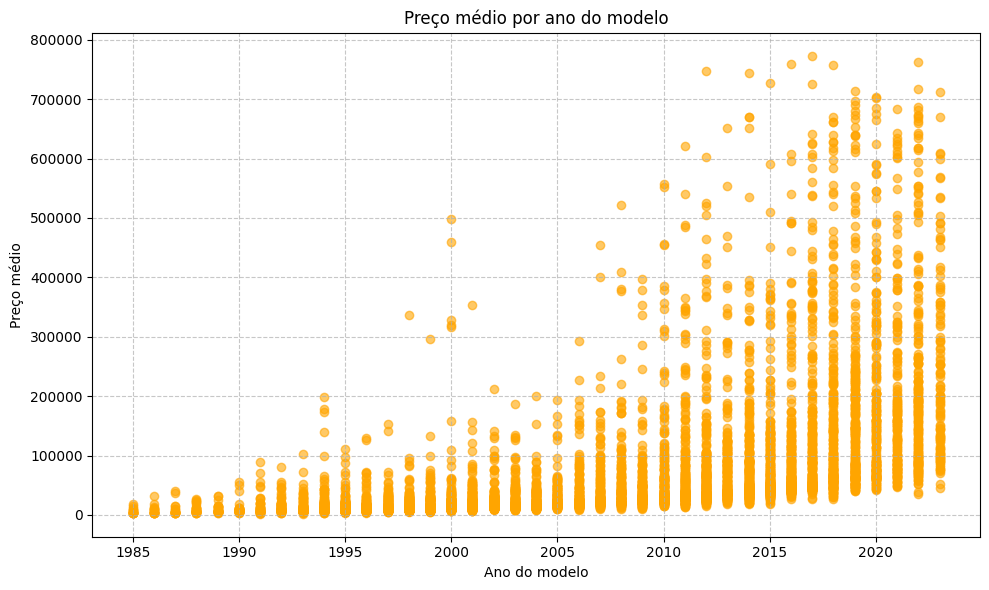

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cars2['year_model'], cars2['avg_price_brl'], color='orange', alpha=0.6)
plt.xlabel('Ano do modelo')
plt.ylabel('Preço médio')
plt.title('Preço médio por ano do modelo')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Mediana da eficiência de preço (preço médio / ano do modelo) para cada marca.

<Axes: xlabel='brand'>

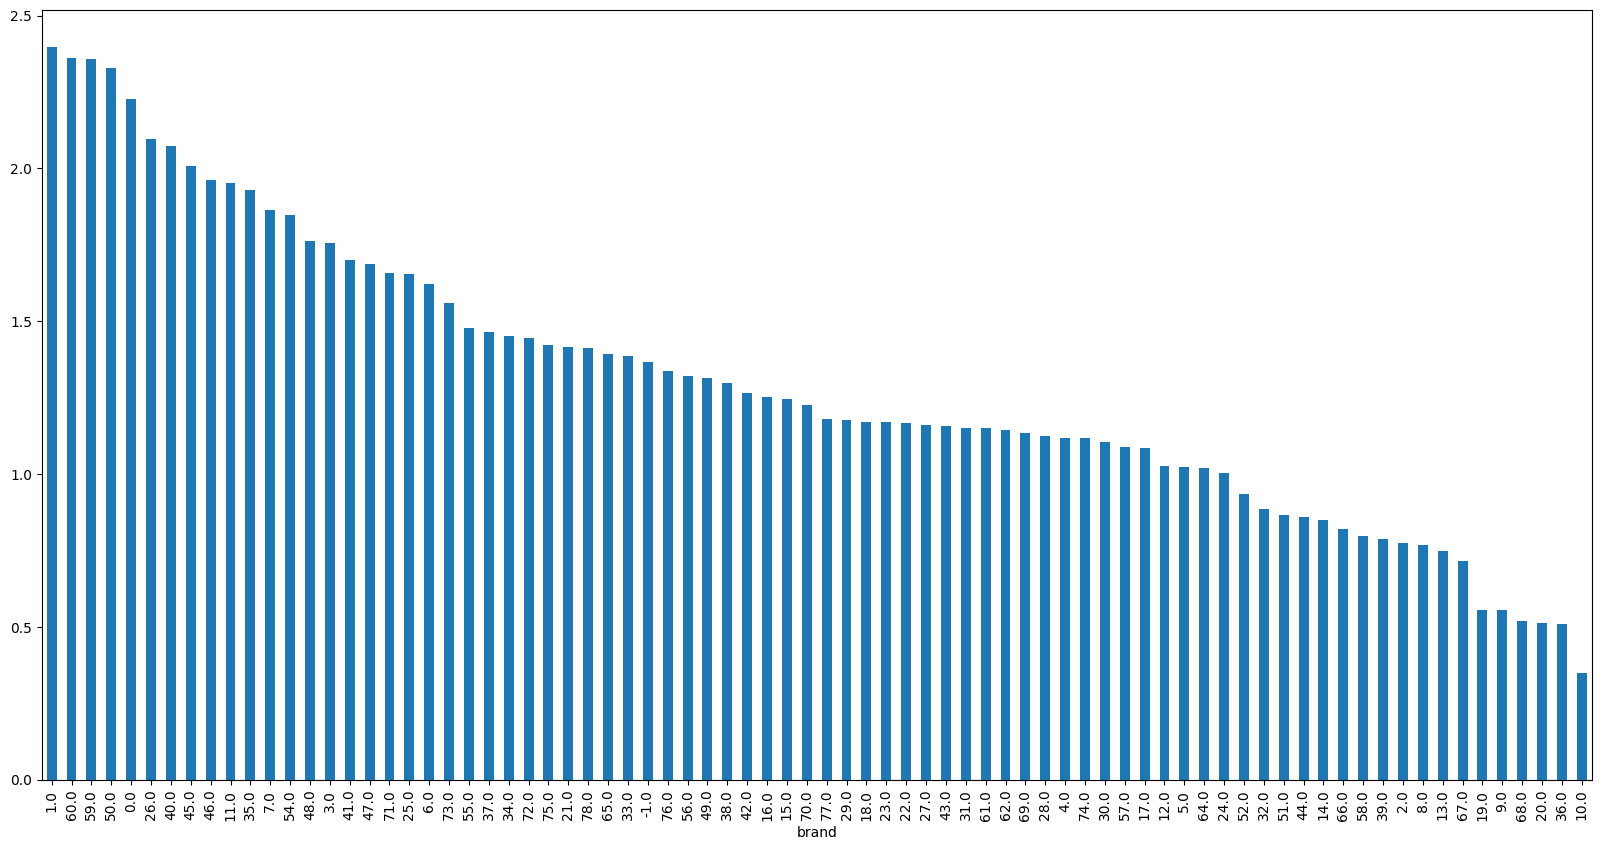

In [ ]:
cars2.groupby(['brand'])['price_efficiency'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [ ]:
cars2.corr(method='pearson', numeric_only=True)

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_log,price_efficiency
year_of_reference,1.000000,-0.057212,-0.014875,0.010370,-0.017757,-0.010829,-0.001836,0.001726,0.050734,0.050731,0.062627,0.062815
month_of_reference,-0.057212,1.000000,0.000763,-0.011587,-0.003143,-0.003950,-0.004614,0.006735,0.001553,0.001544,0.005073,0.005062
brand,-0.014875,0.000763,1.000000,0.088707,-0.046741,-0.054473,-0.083901,0.015805,-0.020049,-0.020037,-0.017343,-0.017461
model,0.010370,-0.011587,0.088707,1.000000,-0.075174,0.031558,-0.017421,0.060971,-0.005259,-0.005260,0.032535,0.032389
fuel,-0.017757,-0.003143,-0.046741,-0.075174,1.000000,-0.090983,-0.155758,0.010248,-0.064000,-0.063994,-0.123362,-0.123787
gear,-0.010829,-0.003950,-0.054473,0.031558,-0.090983,1.000000,-0.017362,-0.361979,-0.203197,-0.203207,-0.324920,-0.324465
engine_size,-0.001836,-0.004614,-0.083901,-0.017421,-0.155758,-0.017362,1.000000,-0.109781,0.373700,0.373699,0.371348,0.372946
year_model,0.001726,0.006735,0.015805,0.060971,0.010248,-0.361979,-0.109781,1.000000,0.513832,0.513832,0.768459,0.766797
avg_price_brl,0.050734,0.001553,-0.020049,-0.005259,-0.064000,-0.203197,0.373700,0.513832,1.000000,1.000000,0.821980,0.822456
avg_price_brl_norm,0.050731,0.001544,-0.020037,-0.005260,-0.063994,-0.203207,0.373699,0.513832,1.000000,1.000000,0.821981,0.822457


## Testes de Hipótese

In [ ]:
from scipy import stats

In [ ]:
cars2.head()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,avg_price_brl_norm,avg_price_brl_interval,avg_price_brl_log,price_efficiency
0,2022.000000,10.0,31.0,2100.0,2.0,1.0,1.400000,2011.0,27685.0,-0.277996,barato,4.442245,1.138832
1,2022.000000,7.0,6.0,282.0,2.0,1.0,1.800000,2005.0,24261.0,-0.288844,barato,4.384909,1.082794
2,2022.000000,6.0,45.0,2391.0,2.0,0.0,2.000000,2014.0,147161.0,0.100543,caro,5.167793,1.863733
3,2022.000000,6.0,19.0,1186.0,2.0,1.0,2.000000,1997.0,8483.0,-0.338834,muito barato,3.928549,0.628171
4,2022.184267,3.0,-1.0,2588.0,2.0,1.0,2.815759,2015.0,371457.0,0.809500,caro,5.569909,2.265633


### Hipótese nula: a eficiência de preço segue uma gaussiana

<Axes: ylabel='Frequency'>

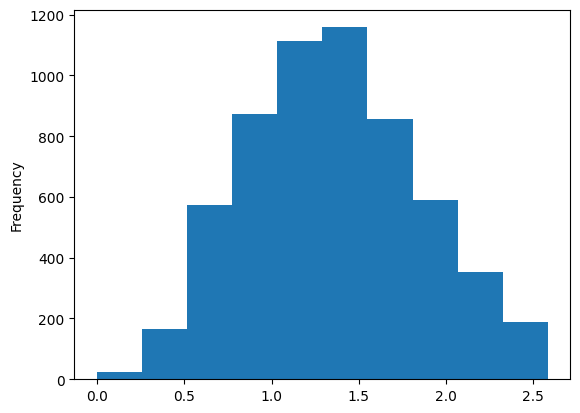

In [ ]:
cars2['price_efficiency'].plot(kind='hist')

In [ ]:
stats.shapiro(cars2['price_efficiency'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9914418458938599, pvalue=2.031230916039809e-18)

O p-value se apresentou muito baixo, menor que 0.1 e muito próximo de 0. Isso significa que a hipótese nula foi rejeitada e a eficiência do preço não segue uma gaussiana.

### Hipótese nula: Não há uma diferença significativa nos preços médios das marcas 59 e 60.

Estamos comparando os preços médios de duas marcas diferentes de carros (marcas 59 e 60), e cada amostra (marca) é independente uma da outra, isso significa que utilizaremos um teste para 2 grupos não pareados. Agora só resta descobrir se eles seguem uma distribuição normal ou não para saber qual teste utilizar.

In [ ]:
precos_marca_59 = cars2[cars2['brand'] == 59]['avg_price_brl']
precos_marca_60 = cars2[cars2['brand'] == 60]['avg_price_brl']

print("Testes de Shapiro-Wilk")
statistic_59, p_value_59 = stats.shapiro(precos_marca_59)
print("Para a marca 59:")
print("Estatística de teste:", statistic_59)
print("Valor p:", p_value_59)

statistic_60, p_value_60 = stats.shapiro(precos_marca_60)
print("\nPara a marca 60:")
print("Estatística de teste:", statistic_60)
print("Valor p:", p_value_60)

Testes de Shapiro-Wilk
Para a marca 59:
Estatística de teste: 0.9513406753540039
Valor p: 0.0007767464267089963

Para a marca 60:
Estatística de teste: 0.9248899221420288
Valor p: 0.5647008419036865


O p-value da marca 59 é menor que 0.1, então a hipótese nula é rejeitada e esses dados não seguem uma distribuição normal. Já para a marca 60, a hipótese nula não foi rejeitada, pois o p-value é 0.56.
Sabendo que se trata de 2 grupos não pareados e que não seguem uma distribuição normal, o teste escolhido para ser utilizado é o de **Mann-Whitney**.

In [ ]:
t_statistic, p_value = stats.mannwhitneyu(precos_marca_59, precos_marca_60)

print("Resultado do teste Mann-Whitney:")
print("Valor p:", p_value)

Resultado do teste Mann-Whitney:
Valor p: 0.9687012452662253


O p-value se apresentou muito alto, maior que 0.1. Isso significa que a hipótese nula não foi rejeitada e não há uma diferença significativa nos preços médios das marcas 59 e 60.

## Exportando o dataset manipulado para utilizar no segundo projeto

In [ ]:
cars2.to_excel('cars.xlsx', index=False)

from google.colab import files

files.download('cars.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>